In [2]:
import numpy as np
from sympy import symbols, Matrix, simplify
import matplotlib.pyplot as plt
from pyscf import gto, scf
from scipy.linalg import fractional_matrix_power
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/rhf')
import plottingsystem as pts
import sys
sys.path.append('/workspaces/bachelor-project-bridging-profile-Mattice-Criel/projects/Project-MatticeCriel/Benzene/Huckel')
from class_huckel import huckel

In [3]:
benzene_molecule = '''
  C    1.2116068    0.6995215    0.0000000
  C    1.2116068   -0.6995215    0.0000000
  C   -0.0000000   -1.3990430   -0.0000000
  C   -1.2116068   -0.6995215   -0.0000000
  C   -1.2116068    0.6995215   -0.0000000
  C    0.0000000    1.3990430    0.0000000
  H    2.1489398    1.2406910    0.0000000
  H    2.1489398   -1.2406910    0.0000000
  H   -0.0000000   -2.4813820   -0.0000000
  H   -2.1489398   -1.2406910   -0.0000000
  H   -2.1489398    1.2406910   -0.0000000
  H    0.0000000    2.4813820    0.0000000
'''
extra_bounds = [(0,5)]
coordinates = pts.taking_x_and_y_coordinate(pts.taking_carbon_coordinates(benzene_molecule))


benzene_molecule_with_H = gto.M(atom=benzene_molecule, basis='sto-3g')#'sto-6g''ccpvdz'

pz_indices = [i for i, label in enumerate(benzene_molecule_with_H.ao_labels()) if 'C 2pz' in label]
print(pz_indices)
hf = scf.RHF(benzene_molecule_with_H)
hf_energy = hf.kernel()

[4, 9, 14, 19, 24, 29]
converged SCF energy = -227.890280218619


In [4]:
S = hf.get_ovlp()[[4, 9, 14, 19, 24, 29]][:, [4, 9, 14, 19, 24, 29]]
print(S)

[[1.         0.21339626 0.02524014 0.00997435 0.02524014 0.21339626]
 [0.21339626 1.         0.21339626 0.02524014 0.00997435 0.02524014]
 [0.02524014 0.21339626 1.         0.21339626 0.02524014 0.00997435]
 [0.00997435 0.02524014 0.21339626 1.         0.21339626 0.02524014]
 [0.02524014 0.00997435 0.02524014 0.21339626 1.         0.21339626]
 [0.21339626 0.02524014 0.00997435 0.02524014 0.21339626 1.        ]]


In [5]:
K= 1.75
a= -2
H = np.array(
    [
    [a, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, a, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, a]
]
)
print(H)

[[-2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -2.  0.]
 [ 0.  0.  0.  0.  0. -2.]]


In [6]:
for i in range(6):
    for j in range(6):
        if i != j:
            H[i, j] = K*S[i,j]*(H[i,i]+H[j,j])/2
        
        
print(H)


A = fractional_matrix_power(S, -0.5)
A = np.asarray(A)
ASA = A@S@A

[[-2.         -0.37344346 -0.04417024 -0.01745511 -0.08834048 -0.7468869 ]
 [-0.37344346  0.          0.          0.         -0.01745511 -0.04417024]
 [-0.04417024  0.          0.          0.         -0.04417024 -0.01745511]
 [-0.01745511  0.          0.          0.         -0.37344346 -0.04417024]
 [-0.08834048 -0.01745511 -0.04417024 -0.37344346 -2.         -0.7468869 ]
 [-0.7468869  -0.04417024 -0.01745511 -0.04417024 -0.7468869  -2.        ]]


In [7]:
H_p = A @ H @ A 
eigenvalues, C_p = np.linalg.eigh(H_p)

print(eigenvalues)
C = A @ C_p

for i in range(6):
    C[:,i] = (np.dot(C[:,i], C[:,i]))**(-1/2) * C[:,i]

print(C)


[-2.36319168e+00 -1.96215851e+00 -1.39117742e+00  3.49229290e-05
  7.10690454e-02  8.96009157e-02]
[[-5.12397973e-01 -7.06926835e-01  4.88268227e-01  4.76836404e-04
   1.29979507e-01  1.54605544e-01]
 [ 3.46705698e-02  1.59514778e-02  2.40506541e-02 -1.06047694e-01
  -6.95057787e-01 -6.79498329e-01]
 [-6.30659473e-03 -1.06366861e-16 -5.76600037e-03  9.88680344e-01
  -3.76103056e-16  1.47062512e-01]
 [ 3.46705698e-02 -1.59514778e-02  2.40506541e-02 -1.06047694e-01
   6.95057787e-01 -6.79498329e-01]
 [-5.12397973e-01  7.06926835e-01  4.88268227e-01  4.76836404e-04
  -1.29979507e-01  1.54605544e-01]
 [-6.87351995e-01 -3.45870255e-15 -7.22494403e-01 -4.30076190e-03
  -5.92021179e-16 -8.44447232e-02]]


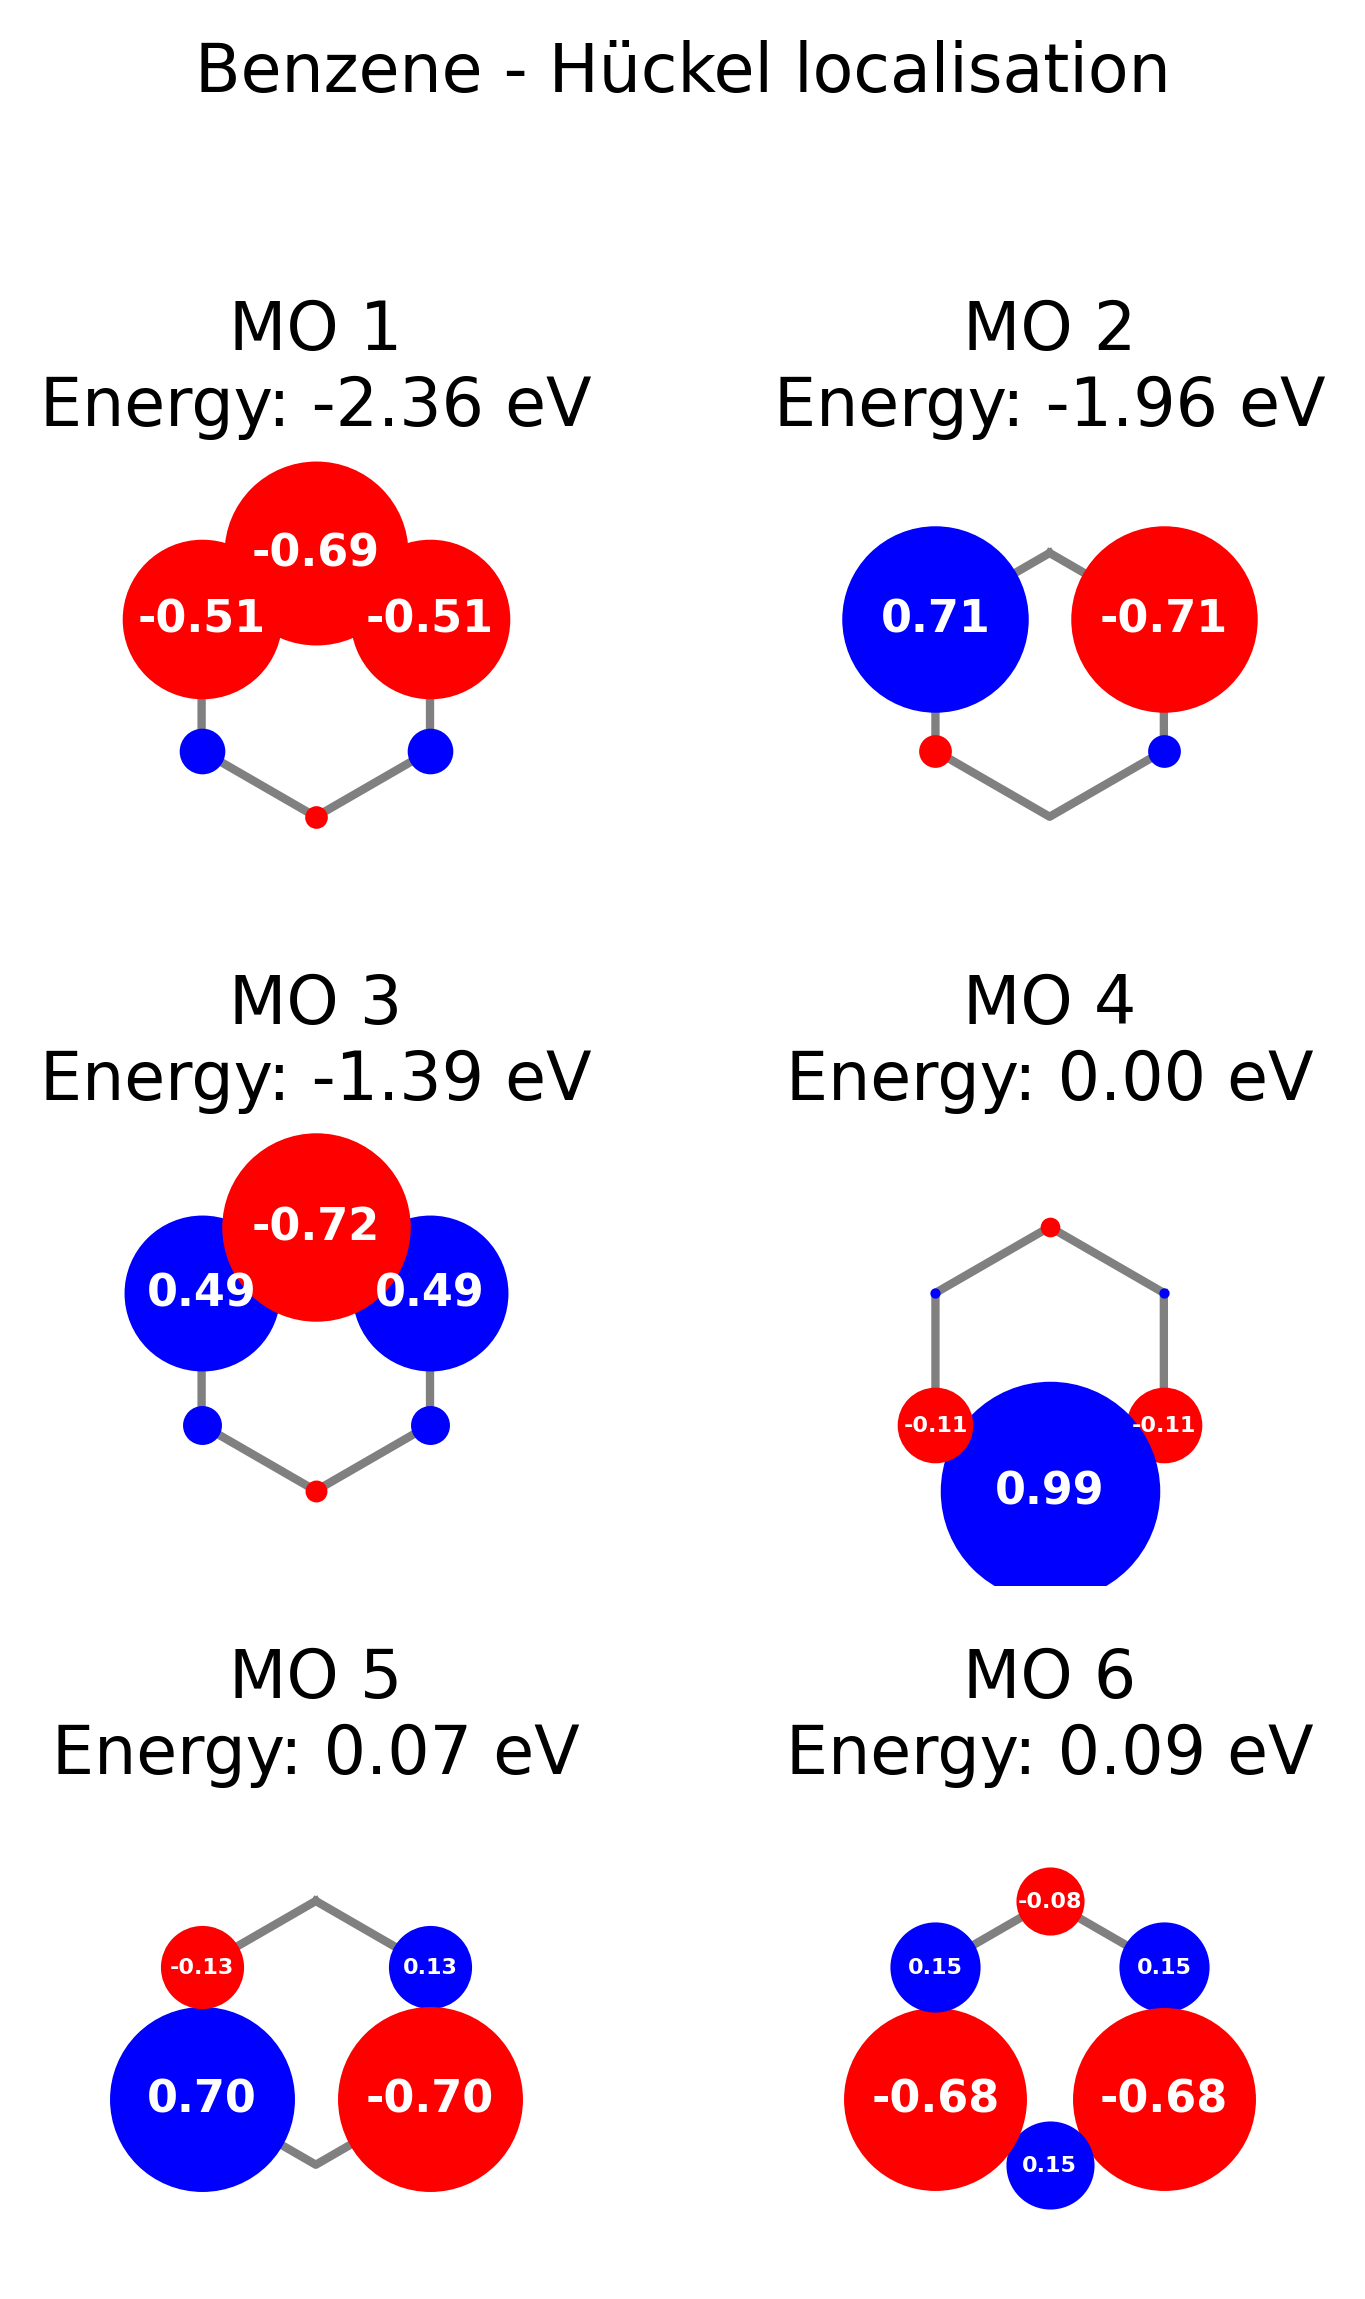

In [8]:
pts.plot_MOs(eigenvalues, C, coordinates, extra_bounds, 'Benzene', 'Hückel localisation', (4,6))

[[ 2.00140619e+00 -3.45969744e-02  8.32263155e-04  1.05091366e-02
   2.42398701e-03 -1.14658465e-03]
 [-3.45969744e-02  4.06986404e-03 -7.14658627e-04  3.05206546e-03
   1.05091366e-02 -8.24146966e-02]
 [ 8.32263155e-04 -7.14658627e-04  1.46039795e-04 -7.14658627e-04
   8.32263155e-04  1.70015069e-02]
 [ 1.05091366e-02  3.05206546e-03 -7.14658627e-04  4.06986404e-03
  -3.45969744e-02 -8.24146966e-02]
 [ 2.42398701e-03  1.05091366e-02  8.32263155e-04 -3.45969744e-02
   2.00140619e+00 -1.14658465e-03]
 [-1.14658465e-03 -8.24146966e-02  1.70015069e-02 -8.24146966e-02
  -1.14658465e-03  1.98890186e+00]]


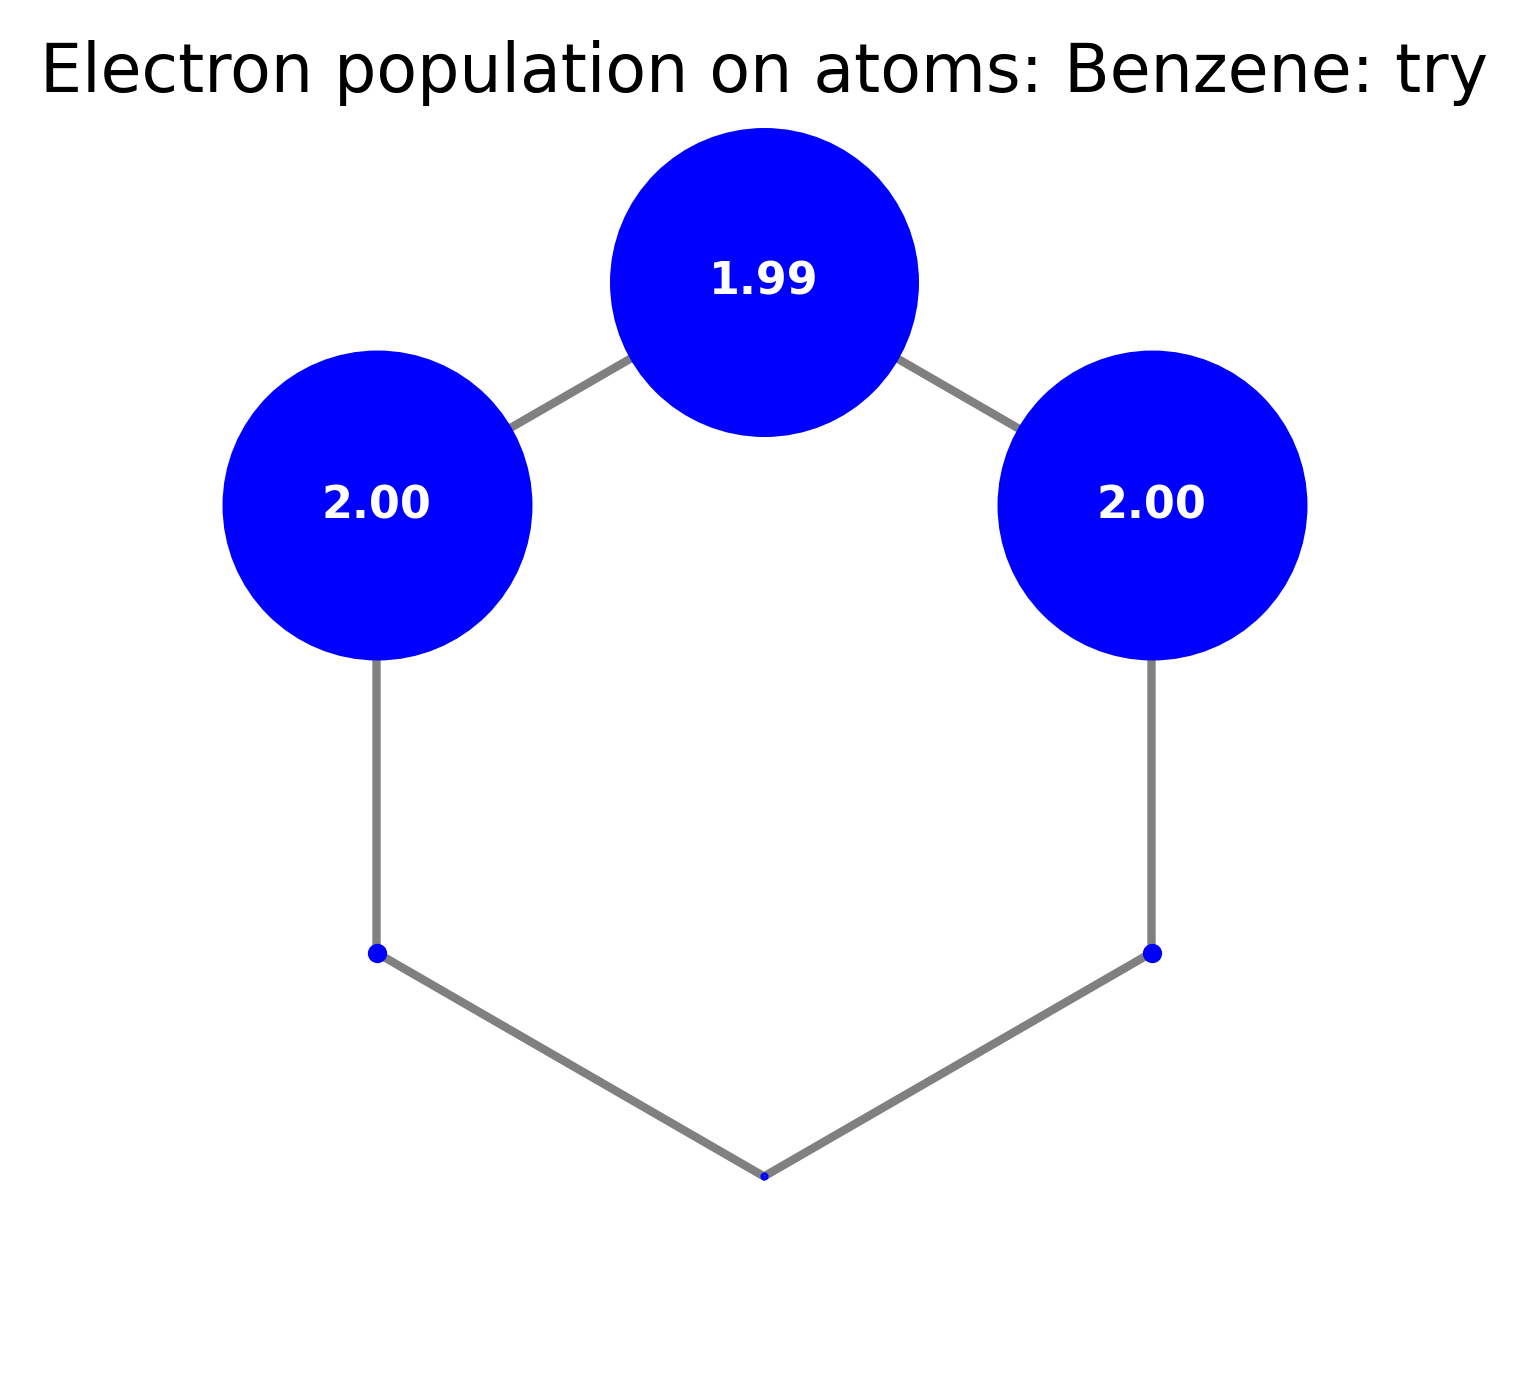

In [9]:
D = pts.making_D(C, 6)
print(D)
pts.plotting_of_D_atoms(6, coordinates, extra_bounds, D, 'Benzene', 'try')